In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#pip install split-folders
import splitfolders  # or import split_folders

input_folder = 'C:/Users/Adavi Anantha/Downloads/Tomato-Leaf-Disease-Research-Dataset-/Tomato-Leaf-Disease-Research-Dataset-Train-Valid'

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output="newdata", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values

Copying files: 14529 files [00:59, 244.78 files/s]


In [43]:
train_path = 'C:/Users/Adavi Anantha/Downloads/newdata/train'
valid_path = 'C:/Users/Adavi Anantha/Downloads/newdata/val'
test_path = 'C:/Users/Adavi Anantha/Downloads/newdata/test'

In [44]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224, 224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=10, shuffle=False)


Found 11618 images belonging to 10 classes.
Found 1449 images belonging to 10 classes.
Found 1462 images belonging to 10 classes.


In [5]:
assert train_batches.n == 11618
assert valid_batches.n == 1449
assert test_batches.n == 1462
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 10

In [6]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [7]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [8]:
x = mobile.layers[-2].output
output = Dense(units=10, activation = 'softmax')(x)

In [9]:
model = Model(inputs=mobile.input, outputs=output)

In [10]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9


Train the model  

In [12]:
model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history=model.fit(x=train_batches, validation_data=valid_batches, epochs=15, verbose=2)

Epoch 1/15
1162/1162 - 1069s - loss: 0.6314 - accuracy: 0.8180 - val_loss: 0.1870 - val_accuracy: 0.9379 - 1069s/epoch - 920ms/step
Epoch 2/15
1162/1162 - 1458s - loss: 0.1817 - accuracy: 0.9396 - val_loss: 0.1289 - val_accuracy: 0.9572 - 1458s/epoch - 1s/step
Epoch 3/15
1162/1162 - 960s - loss: 0.1009 - accuracy: 0.9657 - val_loss: 0.1040 - val_accuracy: 0.9634 - 960s/epoch - 827ms/step
Epoch 4/15
1162/1162 - 950s - loss: 0.0744 - accuracy: 0.9752 - val_loss: 0.0977 - val_accuracy: 0.9662 - 950s/epoch - 817ms/step
Epoch 5/15
1162/1162 - 950s - loss: 0.0552 - accuracy: 0.9822 - val_loss: 0.0928 - val_accuracy: 0.9724 - 950s/epoch - 817ms/step
Epoch 6/15
1162/1162 - 979s - loss: 0.0480 - accuracy: 0.9845 - val_loss: 0.0948 - val_accuracy: 0.9738 - 979s/epoch - 842ms/step
Epoch 7/15
1162/1162 - 946s - loss: 0.0361 - accuracy: 0.9894 - val_loss: 0.0789 - val_accuracy: 0.9765 - 946s/epoch - 814ms/step
Epoch 8/15
1162/1162 - 941s - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0794 - val_ac

In [14]:
test_labels = test_batches.classes

In [15]:
predictions = model.predict(x=test_batches, verbose=0)

In [16]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j]> thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel("Predicted label1")

In [17]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [18]:
test_batches.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

Confusion matrix, without normalization
[[169   0   0   0   0   0   1   0   0   1]
 [  1  73   3   0   2   0   0   0   1   0]
 [  0   3 151   0   0   0   0   0   0   0]
 [  0   0   0  73   4   0   0   0   0   0]
 [  2   0   0   0 140   0   1   0   0   0]
 [  0   0   0   1   2 131   1   0   0   0]
 [  0   1   0   0   0   3 109   0   0   0]
 [  0   0   0   0   0   0   0 430   0   0]
 [  0   0   0   0   0   0   0   0  31   0]
 [  0   0   0   0   0   0   0   0   0 128]]


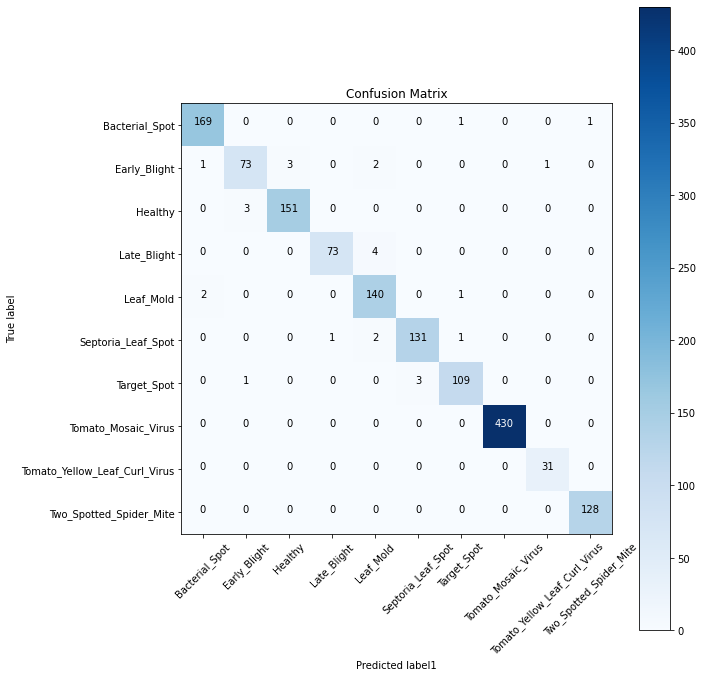

In [19]:
cm_plot_labels = ['Bacterial_Spot', 'Early_Blight', 'Healthy', 'Late_Blight', 'Leaf_Mold', 'Septoria_Leaf_Spot', 'Target_Spot', 'Tomato_Mosaic_Virus', 'Tomato_Yellow_Leaf_Curl_Virus', 'Two_Spotted_Spider_Mite']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title='Confusion Matrix')

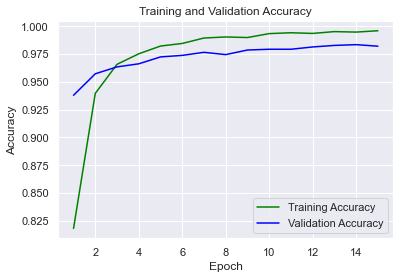

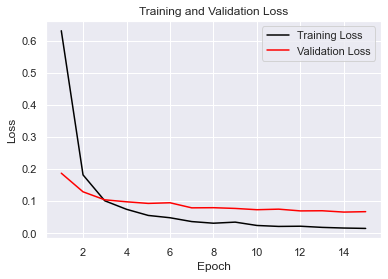

In [20]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='black', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

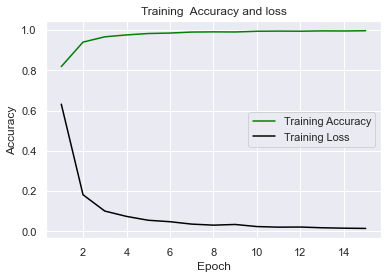

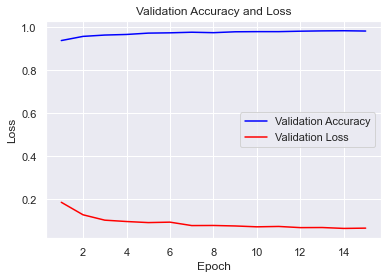

In [21]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, loss, color='black', label='Training Loss')
plt.title('Training  Accuracy and loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Validation Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [53]:
from tensorflow.keras.preprocessing import image
import numpy as np
class pridict:
    def __init__(self , path):
        image_path=path
        new_img = image.load_img(image_path, target_size=(224, 224))
        img = image.img_to_array(new_img)
        img = np.expand_dims(img, axis=0)
        img = img/255

        print("Following is our prediction:")
        prediction = model.predict(img)
        # decode the results into a list of tuples (class, description, probability)
        # (one such list for each sample in the batch)
        d = prediction.flatten()
        j = d.max()
        for index,item in enumerate(d):
            if item == j:
                class_name = li[index]

        ##Another way
        # img_class = classifier.predict_classes(img)
        # img_prob = classifier.predict_proba(img)
        # print(img_class ,img_prob )


        #ploting image with predicted class name        
        plt.figure(figsize = (4,4))
        plt.imshow(new_img)
        plt.axis('off')
        plt.title(class_name)
        plt.show()

In [54]:
class_dict = train_batches.class_indices
print(class_dict)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


In [55]:
li = list(class_dict.keys())
print(li)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


Following is our prediction:
1/1 [==============================] - 2s 2s/step


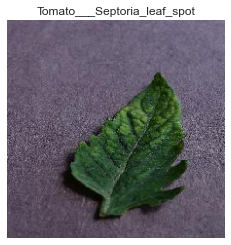

In [65]:
pridict("C:/Users/Adavi Anantha/Downloads/newdata/test/Tomato___Tomato_mosaic_virus/4c518a8d-6ecc-45c2-b14c-f610a400c950___PSU_CG 2370.JPG")

Following is our prediction:
1/1 [==============================] - 0s 113ms/step


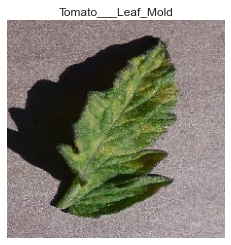

In [66]:
pridict("C:/Users/Adavi Anantha/Downloads/newdata/test/Tomato___Leaf_Mold/4a46bb5d-fbbc-4607-82f0-ed5b98da8a9b___Crnl_L.Mold 6721.JPG")

Following is our prediction:
1/1 [==============================] - 0s 156ms/step


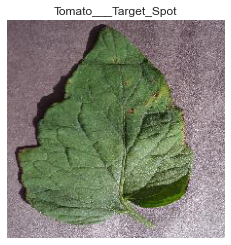

In [67]:
pridict("C:/Users/Adavi Anantha/Downloads/newdata/test/Tomato___Target_Spot/1dcaf64c-19e6-4854-8d99-53c30dbefcef___Com.G_TgS_FL 0999.JPG")

Following is our prediction:
1/1 [==============================] - 0s 130ms/step


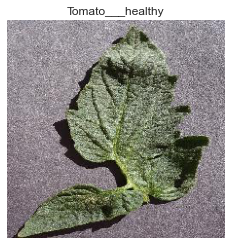

In [68]:
pridict("C:/Users/Adavi Anantha/Downloads/newdata/test/Tomato___healthy/1ad550a2-113e-440c-919d-85dff2f4de38___RS_HL 0331.JPG")

Following is our prediction:
1/1 [==============================] - 0s 103ms/step


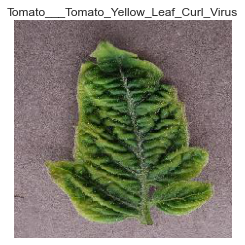

In [69]:
pridict("C:/Users/Adavi Anantha/Downloads/newdata/test/Tomato___Tomato_Yellow_Leaf_Curl_Virus/2e276e98-acbc-44bd-b59d-7323be74a0d4___YLCV_NREC 0156.JPG")

In [70]:
model.save("mobileSGD(0.001)")

INFO:tensorflow:Assets written to: mobileSGD(0.001)\assets


INFO:tensorflow:Assets written to: mobileSGD(0.001)\assets
